In [2]:
from sklearn import tree
from sklearn.datasets import load_iris
from IPython.display import SVG
# from graphviz import Source
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
test = pd.read_csv("test.csv", index_col=0)
y_pred = clf.predict(test.values)
proba = clf.predict_proba(test.values)[:, 1]
results = pd.DataFrame(proba, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submission.csv") 

NameError: name 'clf' is not defined

In [3]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

test = pd.read_csv("/home/philip/Documents/CSM6420/Kaggle-Compettion/test.csv")
train = pd.read_csv("/home/philip/Documents/CSM6420/Kaggle-Compettion/train.csv")


(1039, 1025)
(1000, 1025)
0.762
0
1


<AxesSubplot:>

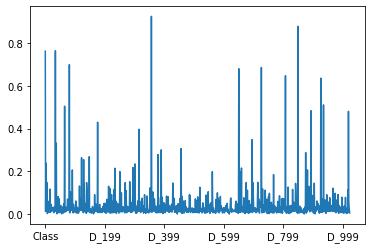

In [4]:
print(test.shape)
print(train.shape)
print(train.Class.mean())
print(train.Class.min())
print(train.Class.max())
train.mean(axis=0).plot()


In [90]:
from sklearn.linear_model import Ridge

y = train['Class']
X = train.drop('Class',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

values = y_train.value_counts().keys().tolist()
counts = y_train.value_counts().tolist()
print(values)
print(counts)
values = y_test.value_counts().keys().tolist()
counts = y_test.value_counts().tolist()
print(values)
print(counts)

# print(values)
# print(counts)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(y.values)


[1, 0]
[295, 105]
[1, 0]
[467, 133]


In [ ]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, ComplementNB,MultinomialNB, BernoulliNB,CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from time import time
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(, 2), random_state=1)
# clf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
# clf = AdaBoostClassifier(n_estimators=100)
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf = RandomForestClassifier(n_estimators=100)
# clf = BernoulliNB(alpha= 0.5, fit_prior=True)
# model = LogisticRegression()
rfe = RFE(clf, 50)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C_range = np.arange(-1000,1000,1)
gamma_range = np.arange(-1000,1000,1)
param_grid = dict(alpha=np.arange(0.0,10.0,0.5),fit_prior=[True,False])
# Your code here
# start = time()

# # rand = GridSearchCV(clf, param_grid,verbose=10)
# # rand.fit(X_train, y_train)

# print("The best parameters are %s with a score of %0.2f"
#      % (rand.best_params_, rand.best_score_))
# clf = svm.SVC(probability=True)



clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

# Check the confusion matrix
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)

# Just get a classification report.
print(classification_report(y_test, y_test_pred))
, stratify=y)

# print(y_test_pred)


In [116]:
test = pd.read_csv("test.csv", index_col=0)
y = test.index
X = test
rfe = RFE(clf, 50)
fit = rfe.fit(X, y)
proba = clf.predict_proba(test.values[0:102])[:, 1]
results = pd.DataFrame(proba, columns=["PredictedScore"])
results.index = test.index.values
results.index.names = ["TestId"]
results.to_csv("submission3.csv") 


ValueError: X has 1024 features, but DecisionTreeClassifier is expecting 102 features as input.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_auc_and_roc(y_true, scores, col='red'):
    fpr, tpr, _ = roc_curve(y_true, scores)
    calc_auc = auc(fpr, tpr)
        
    plt.title("Recieving Operating Characteristic")
    plt.plot(fpr, tpr, col, label="AUC %0.3f" % calc_auc)
    plt.plot([0, 1], [0, 1], "b--")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
# only return the probability prediction for class 1
y_test_prob = clf.predict_proba(X_test)[:,1]
plot_auc_and_roc(y_test, y_test_prob)

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
# only return the probability prediction for class 1
y_test_prob = clf.predict_proba(X_test)[:,0]
plot_auc_and_roc(y_test, y_test_prob)

In [66]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG

def visualise_tree(treeclf):
    dot = export_graphviz(treeclf, filled=True, rounded=True)
    graph = graphviz.Source(dot)
    display(SVG(graph.pipe(format="svg")))

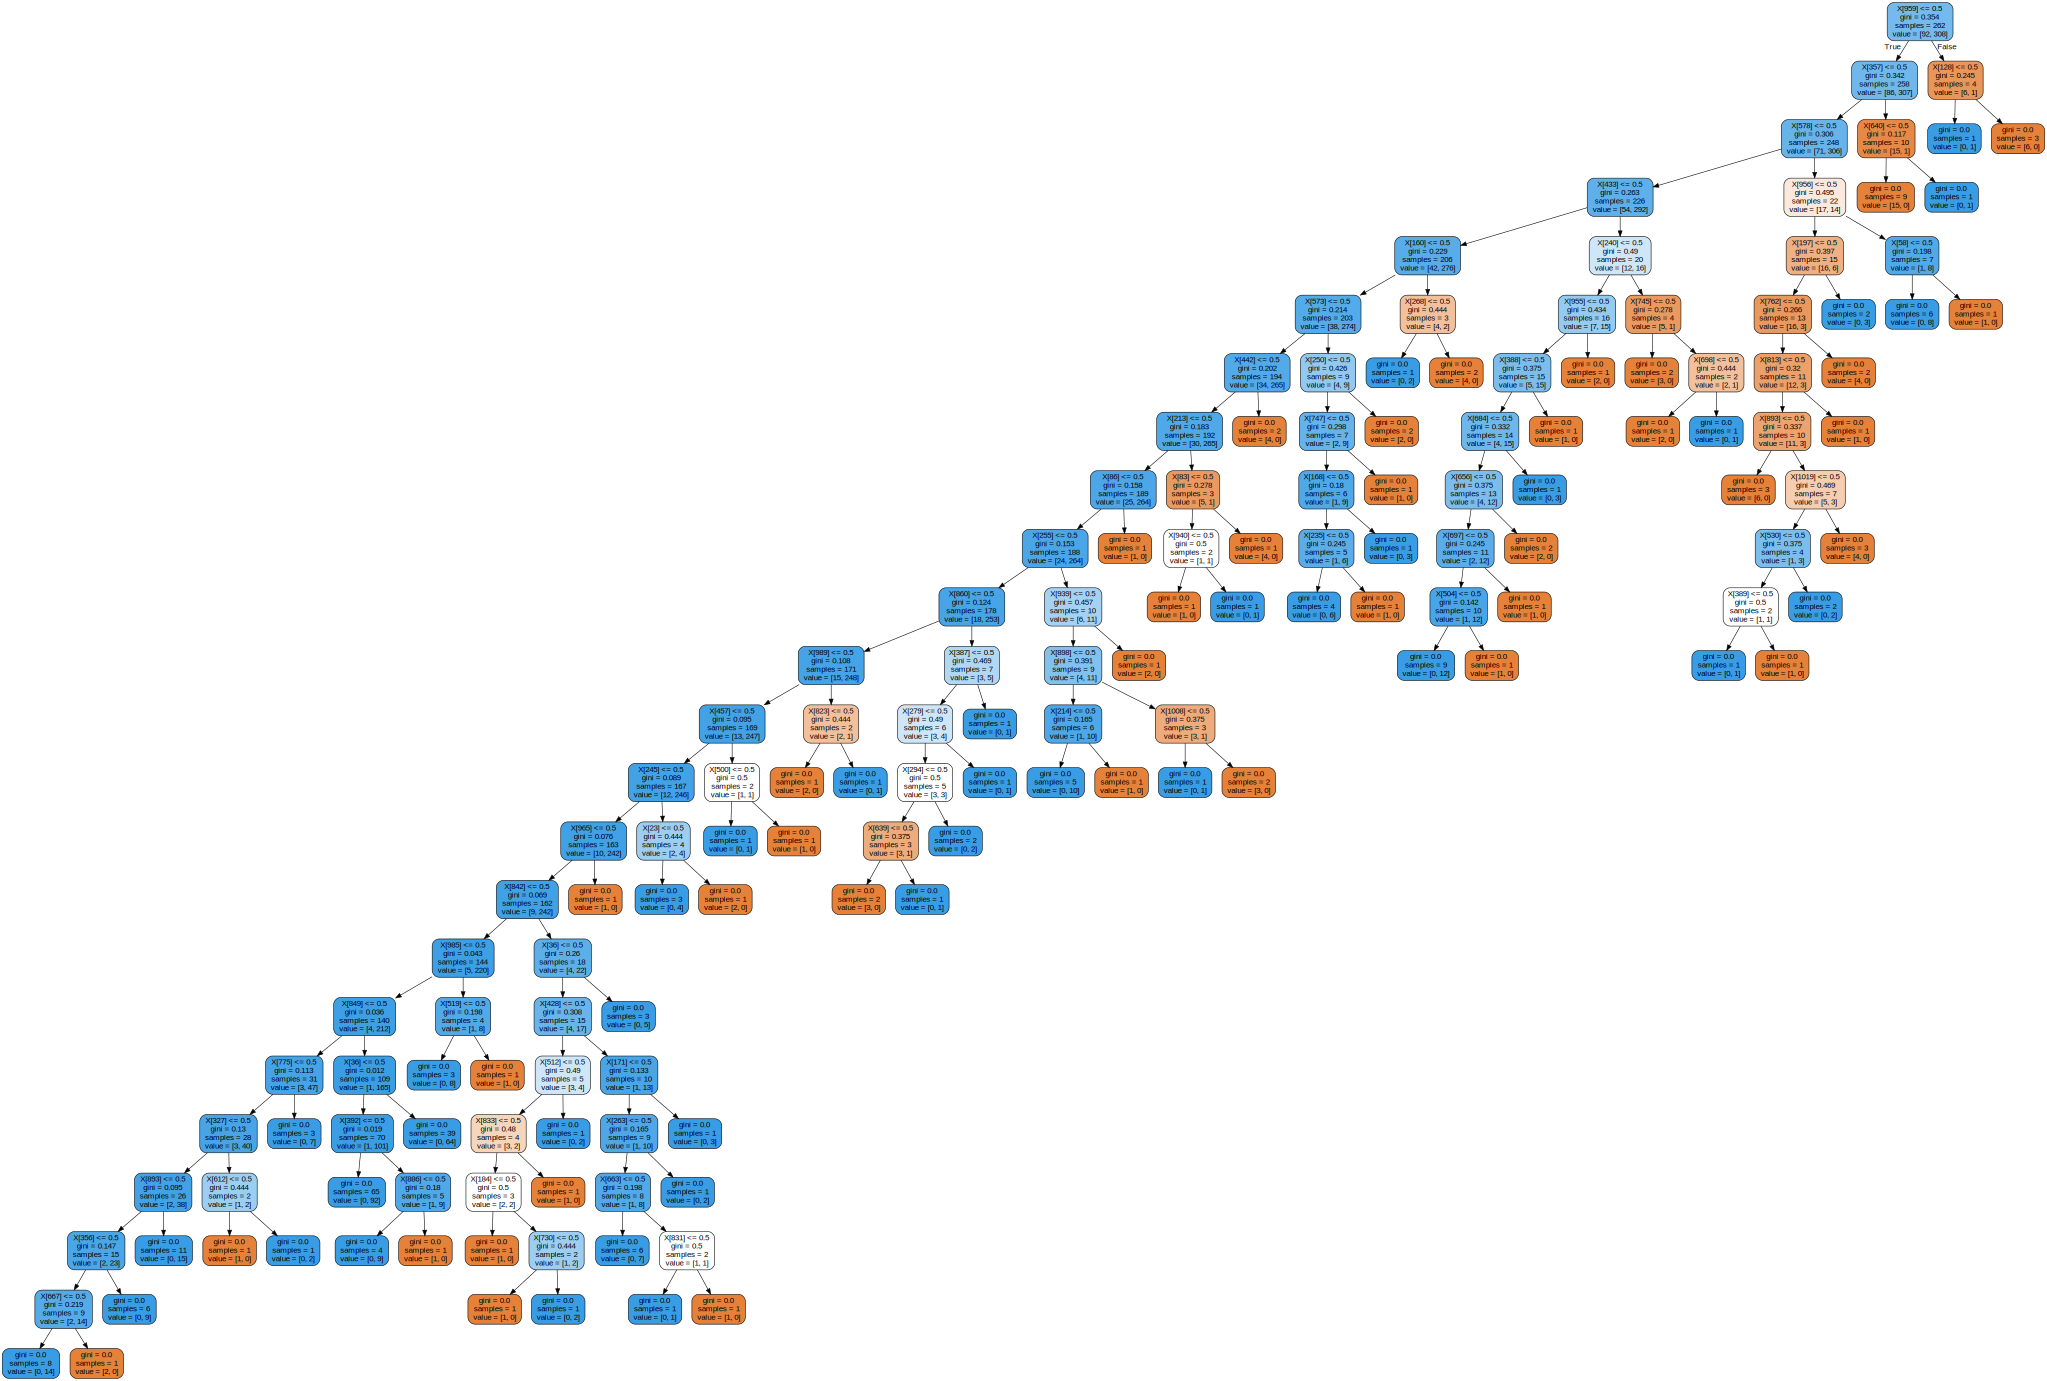

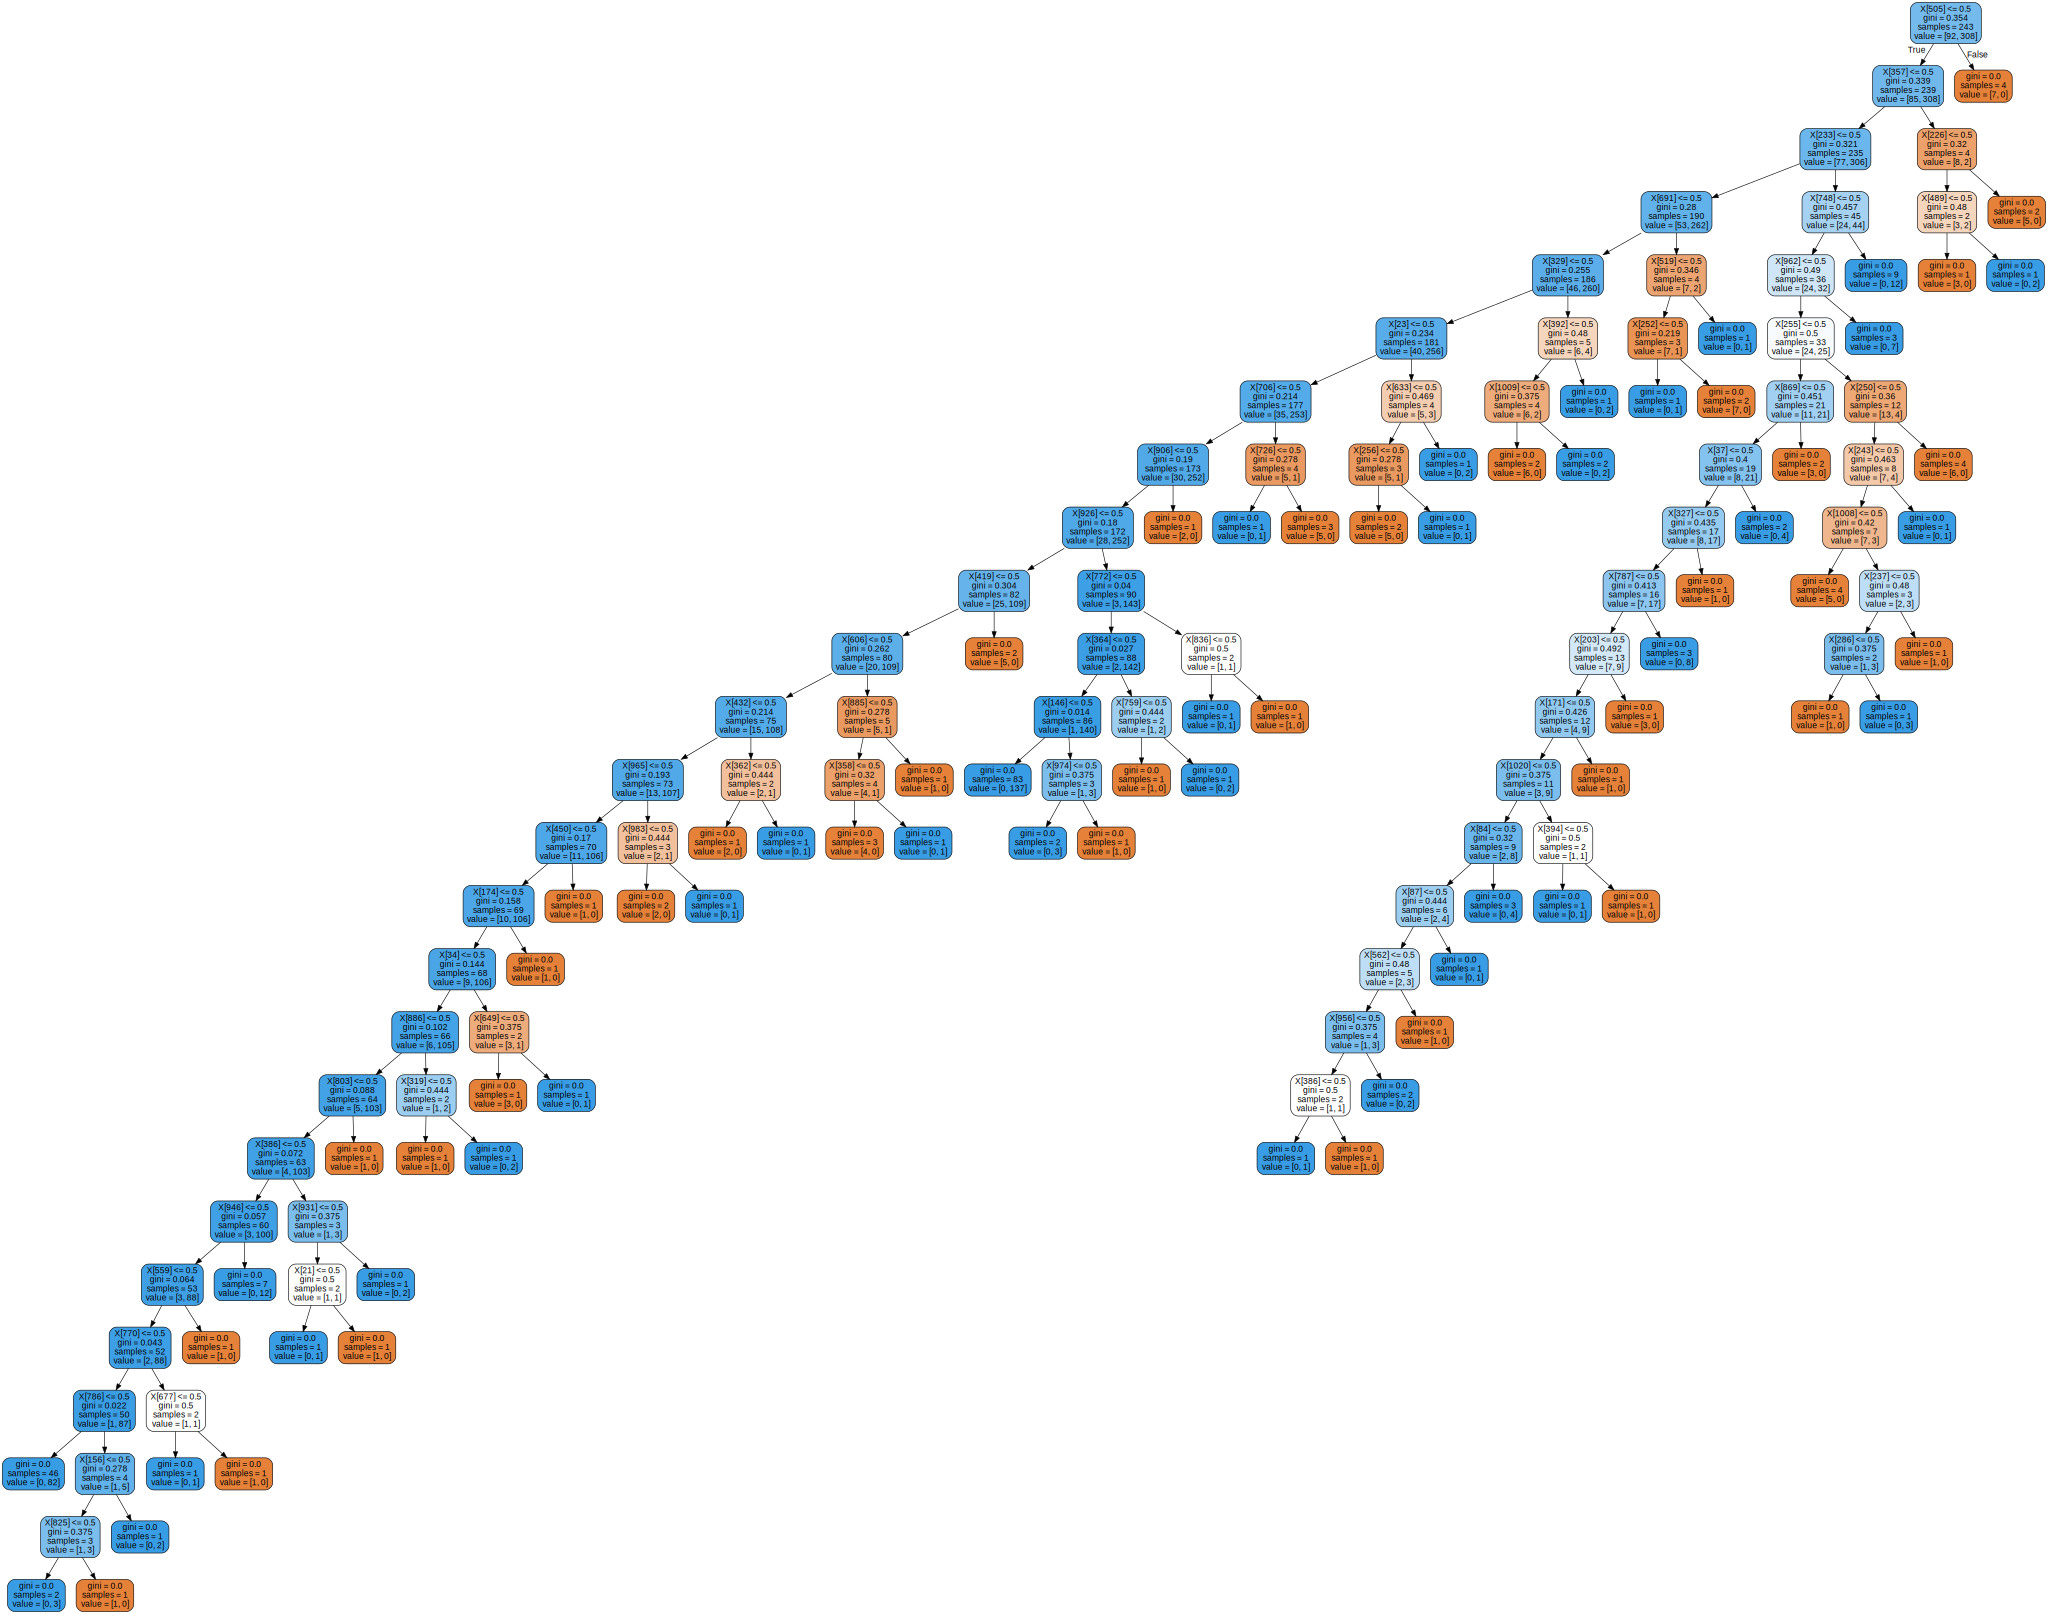

In [41]:
# Your code here 
#
visualise_tree(clf.estimators_[0])

visualise_tree(clf.estimators_[50])

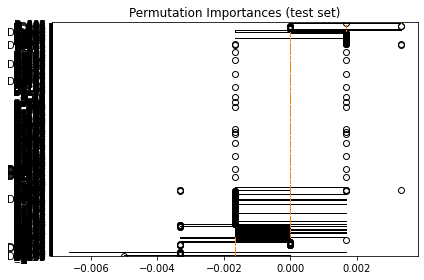

In [39]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=5,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()